In [20]:
import numpy as np
import networkx as nx
from scipy.linalg import expm
from scipy.sparse.linalg import eigs
from scipy.integrate import odeint
import matplotlib.pyplot as plt

(i)

In [21]:
def rwgraph(G,i0=0,M=100,Nt=100):
    """ Question 2.1
    Simulate M Nt-step random walks on input graph, G, with all
    walkers starting at node i0
    Input:
        G: An undirected, unweighted NetworkX graph
        i0: intial node for all walks
        M: Number of walks
        Nt: Number of steps per walk
    Output: X: M x Nt+1 array containing the simulated trajectories
    """
    X = np.zeros((M,Nt+1),dtype = int)
    A = nx.adjacency_matrix(G).todense()
    
    #creating a stochastic matrix
    S = np.zeros(A.shape)
    #populating the columns with Aij/q
    for i in range(len(A)):
        if (np.sum(A[i]) > 0):
            S[i] = A[i]/np.sum(A[i])
    
    #initialising
    X[:,0] = i0
    
    for j in range(M):
        for i in range(1,Nt+1):
            X[j,i] = np.random.choice(len(S),1,p = S[X[j,i-1],:])[0]

    return X

In [22]:
def rwgraph_eff(G,i0=0,M=100,Nt=100):
    """ Question 2.1
    Simulate M Nt-step random walks on input graph, G, with all
    walkers starting at node i0
    Input:
        G: An undirected, unweighted NetworkX graph
        i0: intial node for all walks
        M: Number of walks
        Nt: Number of steps per walk
    Output: X: M x Nt+1 array containing the simulated trajectories
    """
    X = np.zeros((M,Nt+1),dtype = int)
    A = nx.adjacency_matrix(G).todense()
    
    #initialising
    X[:,0] = i0
    
    for j in range(M):
        for i in range(1,Nt+1):
            X[j,i] = np.random.choice(np.nonzero(A[X[j,i-1],:])[1],1)[0]

    return X

(ii)

In [23]:
ba1 = nx.barabasi_albert_graph(n = 2000, m = 4, seed= 10)

In [133]:
from time import time 
t1 = time()
rwgraph(ba1,M = 5000)
t2 = time()
print(t2-t1)

45.26379179954529


In [25]:
from time import time 
t1 = time()
rwgraph_eff(ba1,M = 5000)
t2 = time()
print(t2-t1)

22.139032125473022


In [6]:
sorted(ba1.degree, key=lambda x: x[1], reverse=True)[0]

(7, 158)

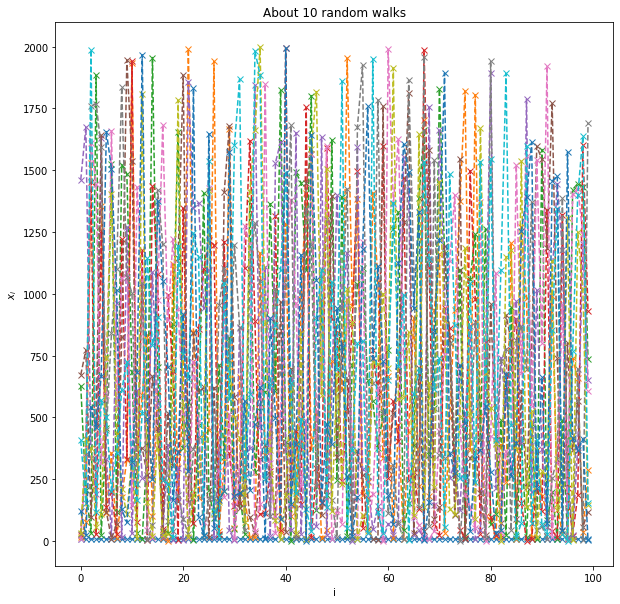

In [123]:
M = 100
Nt = 1000

x = rwgraph_eff(ba1,i0=7)

plt.figure(figsize=(10,10))
plt.plot(x[:,::M//min(10,M)],'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("About %d random walks" %(min(10,M)))
plt.show()
        

In [12]:
x = rwgraph_eff(ba1,i0,M = 100,Nt = 1000)
len(x[:,-1])

100

447.6572468280792


Text(0.5, 1.0, 'Distribution of Walks Across BA(2000,4)')

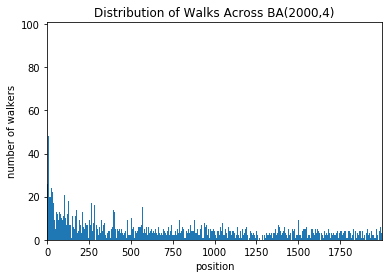

In [16]:
M = 10000
Nt = 1000
i0 = 7

from time import time 
t1 = time()
x = rwgraph_eff(ba1,i0,M,Nt)
t2 = time()
print(t2 - t1)
Xmax = np.max(np.abs(x[:,-1]))
plt.hist(x[:,-1],bins = int(Xmax)) #divide by M to get fraction
plt.xlim(0,Xmax)
plt.xlabel('position')
plt.ylabel('number of walkers')
plt.title('Distribution of Walks Across BA(2000,4)')

485.33771681785583


Text(0.5, 1.0, 'Distribution of Walks Across BA(2000,4)')

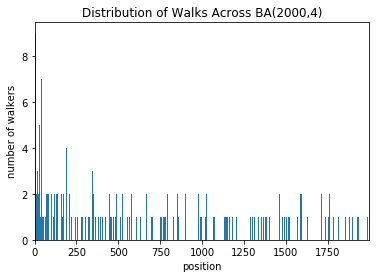

In [26]:
M = 1000
Nt = 10000
i0 = 7

from time import time 
t1 = time()
x = rwgraph_eff(ba1,i0,M,Nt)
t2 = time()
print(t2 - t1)
Xmax = np.max(np.abs(x[:,-1]))
plt.hist(x[:,-1],bins = int(Xmax)) #divide by M to get fraction
plt.xlim(0,Xmax)
plt.xlabel('position')
plt.ylabel('number of walkers')
plt.title('Distribution of Walks Across BA(2000,4)')

In [158]:
ba1 = nx.barabasi_albert_graph(n = 2000, m = 4, seed= 10)

(iii)

In [159]:
Q = np.diag([ba1.degree(i) for i in range(ba1.number_of_nodes())])
A = nx.adjacency_matrix(ba1).todense()#.todense()
I = np.eye(len(A))
Qinv = np.linalg.inv(Q)

L = Q - A
Ls = I - Qinv*A
Ls_trans = Ls.transpose()

In [160]:
L = L.astype(float)
Ls = Ls.astype(float)
Ls_trans = Ls_trans.astype(float)

In [161]:
A = nx.adjacency_matrix(ba1)

Q = A.toarray().sum(axis=1)

L = np.diag(Q)-A.toarray()

e,v = np.linalg.eig(L)

In [168]:
L_sol = np.diag(e)

X = np.zeros((2000,1))
X[2] = 0.3
np.dot(expm(2*L_sol),X)
    

array([[0.00000000e+00],
       [0.00000000e+00],
       [4.35700493e+77],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])

In [64]:
l.size

15

In [65]:
nx.laplacian_spectrum(nx.barabasi_albert_graph(n = 2000,m = 4,seed = 10))

array([3.19830812e-14, 2.03854208e+00, 2.06857968e+00, ...,
       8.99874049e+01, 9.36073603e+01, 1.59099038e+02])

In [ ]:
def rwgraph_analyze1(input=(None)):
    """Analyze simulated random walks on
    Barabasi-Albert graphs.
    Modify input and output as needed.
    """
    M = 10000
    Nt = 1000
    i0 = 7

    x = rwgraph_eff(ba1,i0,M,Nt)

    Xmax = np.max(np.abs(x[:,-1]))
    plt.hist(x[:,-1],bins = int(Xmax)) 
    plt.xlim(0,Xmax)
    plt.xlabel('position')
    plt.ylabel('number of walkers')
    plt.title('Distribution of Walks Across BA(2000,4)')
    
    M = 1000
    Nt = 10000
    i0 = 7


    x = rwgraph_eff(ba1,i0,M,Nt)

    Xmax = np.max(np.abs(x[:,-1]))
    plt.hist(x[:,-1],bins = int(Xmax)) 
    plt.xlim(0,Xmax)
    plt.xlabel('position')
    plt.ylabel('number of walkers')
    plt.title('Distribution of Walks Across BA(2000,4)')

    return None 